### ML - Linear Regression

In [ ]:
# Import the Libraries
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('marketing_customer_analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Exploratory Data Analysis

In [4]:
#create a numerical df to explore the num data
numericals= df.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [5]:
# The numerical columns are as follows
numericals.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [6]:
#checking for nulls
numericals.isnull().sum()/len(df)
#Result : no null values

Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Total Claim Amount               0.0
dtype: float64

In [7]:
numericals['Total Claim Amount'].value_counts(bins=20) #binning the Total Claim Amount

(289.413, 434.07]       2764
(434.07, 578.727]       1971
(-2.795, 144.756]       1279
(144.756, 289.413]      1171
(578.727, 723.384]       845
(723.384, 868.041]       457
(868.041, 1012.698]      265
(1012.698, 1157.355]     121
(1157.355, 1302.012]     101
(1302.012, 1446.669]      82
(1446.669, 1591.326]      25
(1735.983, 1880.64]       12
(1591.326, 1735.983]      11
(1880.64, 2025.297]       11
(2025.297, 2169.955]       8
(2169.955, 2314.612]       5
(2314.612, 2459.269]       3
(2748.583, 2893.24]        2
(2459.269, 2603.926]       1
(2603.926, 2748.583]       0
Name: Total Claim Amount, dtype: int64

In [8]:
numericals['Income'].value_counts(bins=30)

(-99.982, 3332.7]     2317
(23328.9, 26661.6]     500
(19996.2, 23328.9]     460
(26661.6, 29994.3]     421
(33327.0, 36659.7]     308
(36659.7, 39992.4]     295
(29994.3, 33327.0]     290
(59988.6, 63321.3]     283
(56655.9, 59988.6]     277
(49990.5, 53323.2]     273
(43325.1, 46657.8]     265
(39992.4, 43325.1]     265
(69986.7, 73319.4]     250
(66654.0, 69986.7]     249
(53323.2, 56655.9]     241
(73319.4, 76652.1]     238
(63321.3, 66654.0]     227
(46657.8, 49990.5]     219
(76652.1, 79984.8]     210
(16663.5, 19996.2]     204
(86650.2, 89982.9]     184
(79984.8, 83317.5]     181
(83317.5, 86650.2]     180
(89982.9, 93315.6]     164
(96648.3, 99981.0]     163
(9998.1, 13330.8]      161
(13330.8, 16663.5]     157
(93315.6, 96648.3]     152
(6665.4, 9998.1]         0
(3332.7, 6665.4]         0
Name: Income, dtype: int64

<AxesSubplot:>

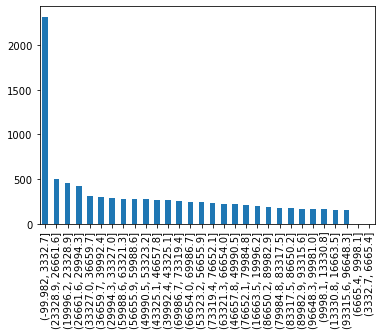

In [9]:
numericals.Income.value_counts(bins=30).plot(kind='bar')

<AxesSubplot:>

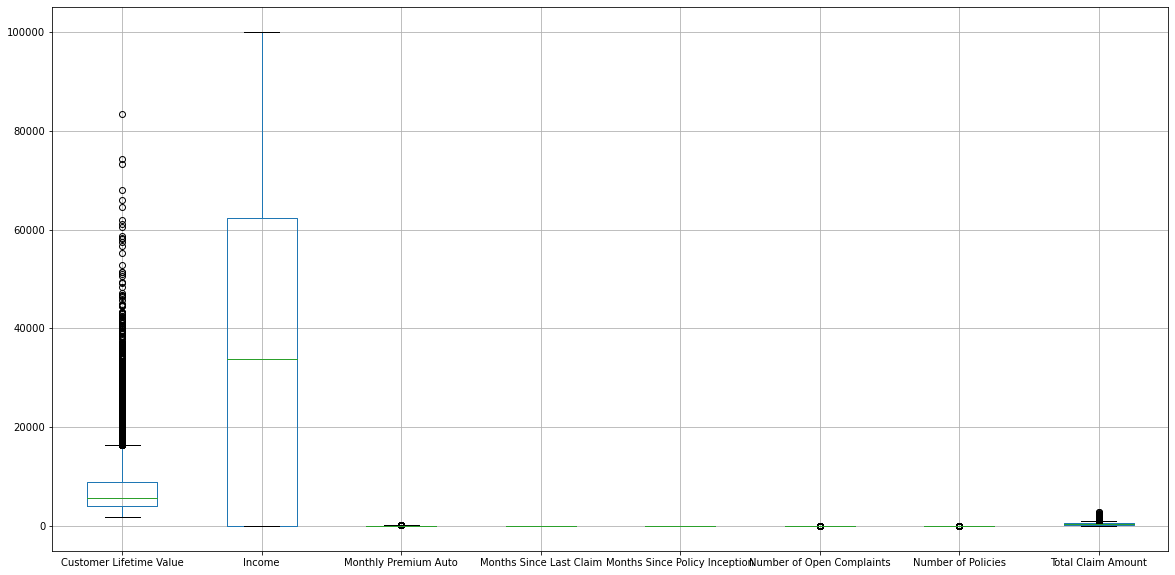

In [10]:
numericals.boxplot(figsize=(20,10))

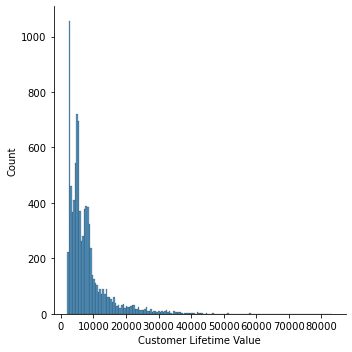

In [11]:
sns.displot(df['Customer Lifetime Value'])
plt.show()

<AxesSubplot:xlabel='Customer Lifetime Value'>

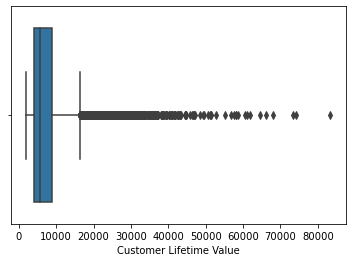

In [12]:
# detetecting outliers for the 'Customer Lifetime Value' column usinf boxplot

sns.boxplot(x=df['Customer Lifetime Value'])

In [13]:
# Removing Outliers usinf IQR
iqr = np.percentile(df['Customer Lifetime Value'],75) - np.percentile(df['Customer Lifetime Value'],25)
upper_limit = np.percentile(df['Customer Lifetime Value'],75) + 1.5*iqr
lower_limit = np.percentile(df['Customer Lifetime Value'],25) - 1.5*iqr

In [14]:
df = df[(df['Customer Lifetime Value']>lower_limit) & (df['Customer Lifetime Value']<upper_limit)]

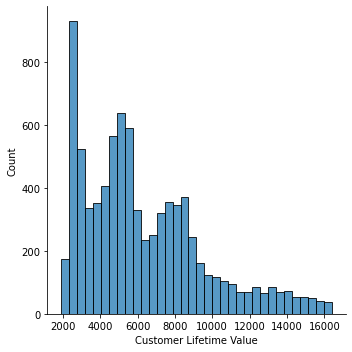

In [15]:
# plotting for 'customer lifetime value'
sns.displot(df['Customer Lifetime Value'])
plt.show()

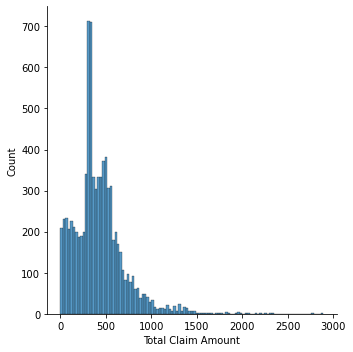

In [16]:
# plotting sns displot for 'total claim amount'
sns.displot(df['Total Claim Amount'])

<AxesSubplot:xlabel='Total Claim Amount'>

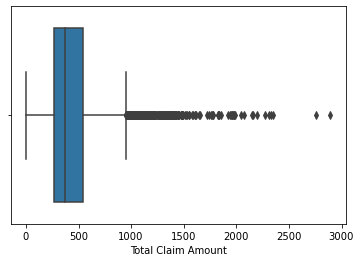

In [17]:
# detect the outliers for the 'Total Claim Amount'
sns.boxplot(x=df['Total Claim Amount'])

In [18]:
#removing outliers for the 'total claim amount' usinf calculated IQRs

iqr = np.percentile(df['Total Claim Amount'],75) - np.percentile(df['Total Claim Amount'],25)
upper_limit = np.percentile(df['Total Claim Amount'],75) + 1.5*iqr
lower_limit = np.percentile(df['Total Claim Amount'],25) - 1.5*iqr


In [19]:
df = df[(df['Total Claim Amount']>lower_limit) & (df['Total Claim Amount']<upper_limit)]

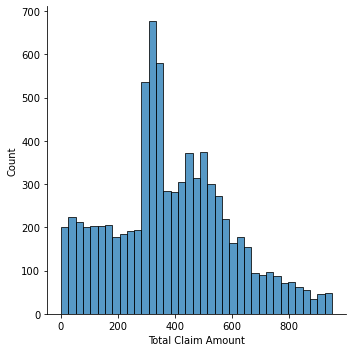

In [20]:
sns.displot(df['Total Claim Amount'])

In [21]:
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### Wrangling - Box cox transformation for making data normal

In [22]:
#dealing with zeros

df['Customer Lifetime Value_']=np.where(df['Customer Lifetime Value']<=0,0,df['Customer Lifetime Value'])

In [23]:
# calculate the mean for the new column
mean=np.sum(df['Customer Lifetime Value_']/len(df[df['Customer Lifetime Value_']>0]))

In [24]:
#replace the zeros with the mean
df['Customer Lifetime Value_']=df['Customer Lifetime Value_'].replace(0,mean)

In [25]:
#if statisfied
df=df.drop(['Customer Lifetime Value'], axis =1)

In [26]:
# boxcox transformation
from scipy import stats
xt, lmbda = stats.boxcox(df['Customer Lifetime Value_'])

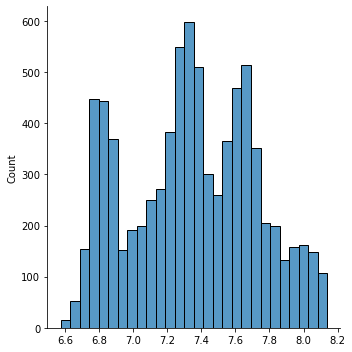

In [27]:
sns.displot(xt)
plt.show()

In [28]:
# transforming 'Total Claim Amount'
df['Total Claim Amount_'] = np.where(df['Total Claim Amount']<0,0,df['Total Claim Amount'])
#calculate the mean for the column 'Total Claim Amount_'
mean = np.sum(df['Total Claim Amount_'])/len(df[df['Total Claim Amount_']>0])
# transforming - replace zero with mean
df['Total Claim Amount_']= df['Total Claim Amount_'].replace(0,mean)


In [29]:
df=df.drop(['Total Claim Amount'], axis=1)

In [30]:
#box cox transfromation
xt1,lmbda1=stats.boxcox(df['Total Claim Amount_'])

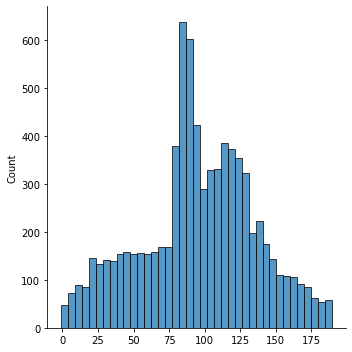

In [31]:
sns.displot(xt1)
plt.show()

In [32]:
df.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Customer Lifetime Value_,Total Claim Amount_
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2763.519279,384.811147
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,12887.431650,566.472247
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,7645.861827,529.881344
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2813.692575,138.130879
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,...,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize,8256.297800,159.383042


### wrangling Categorical columns

In [33]:
# selecting all the categorical columns 
categoricals= df.select_dtypes(np.object)
categoricals.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### Pre-Processing 
- processing the Numerical data using Normalizer


In [34]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
from sklearn.preprocessing import Normalizer

In [36]:
numerical= df.select_dtypes(np.number)
numerical.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer Lifetime Value_,Total Claim Amount_
0,56274,69,32,5,0,1,2763.519279,384.811147
2,48767,108,18,38,0,2,12887.431650,566.472247
3,0,106,18,65,0,7,7645.861827,529.881344
4,43836,73,12,44,0,1,2813.692575,138.130879
5,62902,69,14,94,0,2,8256.297800,159.383042


- Normalising the data

In [46]:

transformer=Normalizer().fit(numerical)
df_normalized=transformer.transform(numerical)
print(df_normalized.shape)
df_normalized

(7962, 8)


array([[9.98772156e-01, 1.22463800e-03, 5.67948057e-04, ...,
        1.77483768e-05, 4.90479814e-02, 6.82977323e-03],
       [9.66746974e-01, 2.14096978e-03, 3.56828297e-04, ...,
        3.96475885e-05, 2.55477793e-01, 1.12296293e-02],
       [0.00000000e+00, 1.38286712e-02, 2.34826493e-03, ...,
        9.13214138e-04, 9.97472731e-01, 6.91278764e-02],
       ...,
       [0.00000000e+00, 1.03625303e-02, 1.09720909e-03, ...,
        2.43824242e-04, 9.95277200e-01, 9.64062747e-02],
       [9.45493129e-01, 4.13688256e-03, 1.46514591e-03, ...,
        1.29277580e-04, 3.24247237e-01, 2.97855545e-02],
       [0.00000000e+00, 2.91609456e-02, 1.13614074e-03, ...,
        3.78713580e-04, 9.89138089e-01, 1.39972539e-01]])

- Categorical data using Encoder

In [38]:
#create a categorical df to explore the categorical data
categoricals= df.select_dtypes(np.object)
categoricals.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
# import the 'Label Encoder'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()
encoded.shape

(7962, 8062)

### Back to the dataframe

In [41]:
# concatenating the transformed nurmerical columns and the encoded categorical columns
X=np.concatenate((df_normalized,encoded),axis=1)
X

array([[9.98772156e-01, 1.22463800e-03, 5.67948057e-04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.66746974e-01, 2.14096978e-03, 3.56828297e-04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.38286712e-02, 2.34826493e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.03625303e-02, 1.09720909e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.45493129e-01, 4.13688256e-03, 1.46514591e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.91609456e-02, 1.13614074e-03, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

### Training the Dataset
- splitting data into train and test randomnly, I've used 65, 35

In [42]:
y = df['Income']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
#splitting data into test and train randomnly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

### Apply Machine Learning
- Linear Regression Model

In [45]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.7494473686347403